# ZTSI

Import necessary libraries and moduels

In [130]:
# import cv2
# import os
# import re
import numpy as np
import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from collections import Counter
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix, classification_report, accuracy_score
# import matplotlib.pyplot as plt
# import seaborn as sns
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.utils.class_weight import compute_class_weight
# from tensorflow.keras.utils import to_categorical
# from keras.regularizers import l2
# from functools import partial
# import keras.backend as K
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import cv2
import torch.nn.functional as F  # Importuj funkcje, w tym softmax

Definition of every funtions used in project

In [2]:
dice5_dir =  'dice5.csv'
dice5_count = 100000

In [3]:
def ReadDiceCSV(file_dir): 
    df = pd.read_csv(file_dir, header=None)

    # Pierwsza kolumna zawiera cyfry, reszta to piksele obrazu
    cyfry = df.iloc[:, 0]  # Pierwsza kolumna z cyframi
    piksele_obrazu = df.iloc[:, 1:]  # Reszta kolumn to piksele obrazu

    # Przekształć dane do postaci tablicy numpy
    cyfry_array = np.array(cyfry)
    piksele_array = np.array(piksele_obrazu)
    return (cyfry_array, piksele_array)

In [4]:
dice_y, dice_x = ReadDiceCSV(dice5_dir)
dice_x = dice_x.reshape((dice5_count, 100, -1))
print("dice:")
print(f"Label Shape: {dice_y.shape} has NAN: {np.isnan(dice_y).any()}")
print(f"Values : {np.unique(dice_y)}")
print(f"Data Shape: {dice_x.shape} has NAN: {np.isnan(dice_x).any()}")
print(f"Values : {np.unique(dice_x)}")


dice:
Label Shape: (100000,) has NAN: False
Values : [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30]
Data Shape: (100000, 100, 100) has NAN: False
Values : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199

{18: 10025, 17: 9911, 19: 9416, 16: 9377, 20: 8383, 15: 8315, 14: 7100, 21: 6972, 22: 5434, 13: 5421, 12: 3923, 23: 3882, 24: 2696, 11: 2653, 25: 1635, 10: 1616, 9: 933, 26: 892, 8: 436, 27: 406, 28: 219, 7: 185, 29: 76, 6: 62, 5: 18, 30: 14}


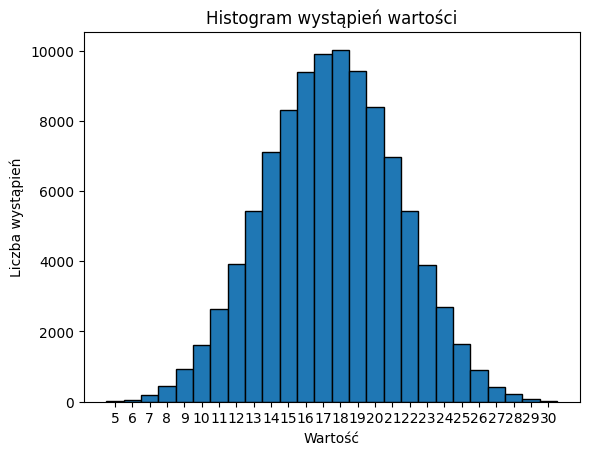

In [5]:
wartosci, liczba_wystapien = np.unique(dice_y, return_counts=True)

slownik_wystapien = dict(zip(wartosci, liczba_wystapien))

posortowany_slownik = dict(sorted(slownik_wystapien.items(), key=lambda x: x[1], reverse=True))

print(posortowany_slownik)

# Tworzenie histogramu
plt.hist(dice_y, bins=np.arange(min(dice_y), max(dice_y) + 2) - 0.5, edgecolor='black')

# Ustawienia wykresu
plt.title('Histogram wystąpień wartości')
plt.xlabel('Wartość')
plt.ylabel('Liczba wystąpień')
plt.xticks(np.arange(min(dice_y), max(dice_y) + 1))

# Wyświetlanie wykresu
plt.show()

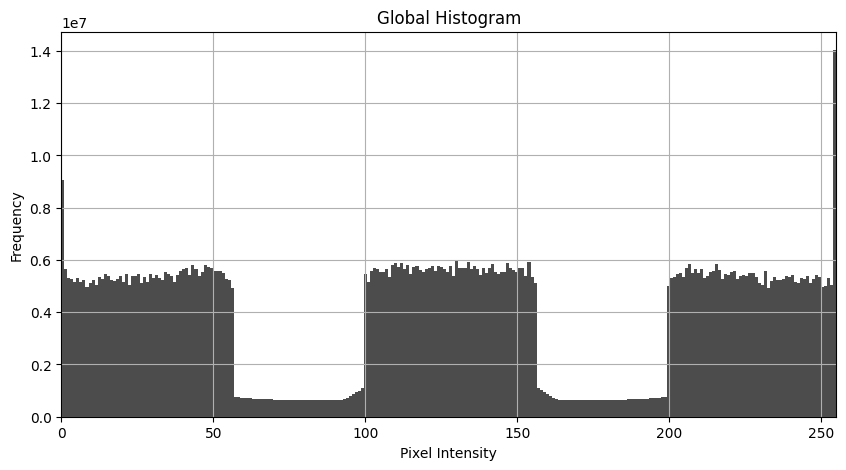

In [122]:
# Przykładowe dane: generujemy tablicę 100000 x 100 x 100 z losowymi wartościami od 0 do 255
images = dice_x

# def compute_global_histogram(images):
#     # Spłaszczamy tablicę do jednego wymiaru
#     flat_array = images.flatten()
    
#     # Zliczamy wystąpienia wartości od 0 do 255
#     histogram, _ = np.histogram(flat_array, bins=np.arange(257))  # 256 binów dla wartości 0-255
    
#     return histogram

# def plot_histogram(hist):
#     plt.figure(figsize=(10, 5))
#     plt.plot(hist, color='black')
#     plt.title('Global Histogram')
#     plt.xlabel('Pixel Intensity')
#     plt.ylabel('Frequency')
#     plt.xlim([0, 255])
#     plt.grid()
#     plt.show()

# # Obliczamy histogram
# global_histogram = compute_global_histogram(images)

# # Wyświetlamy histogram
# plot_histogram(global_histogram)


flat_array = images.flatten()

# Użycie plt.hist() do zliczenia i wyświetlenia histogramu
plt.figure(figsize=(10, 5))
plt.hist(flat_array, bins=256, range=(0, 255), color='black', alpha=0.7)  # 256 binów dla wartości 0-255
plt.title('Global Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 255])
plt.grid()
plt.show()

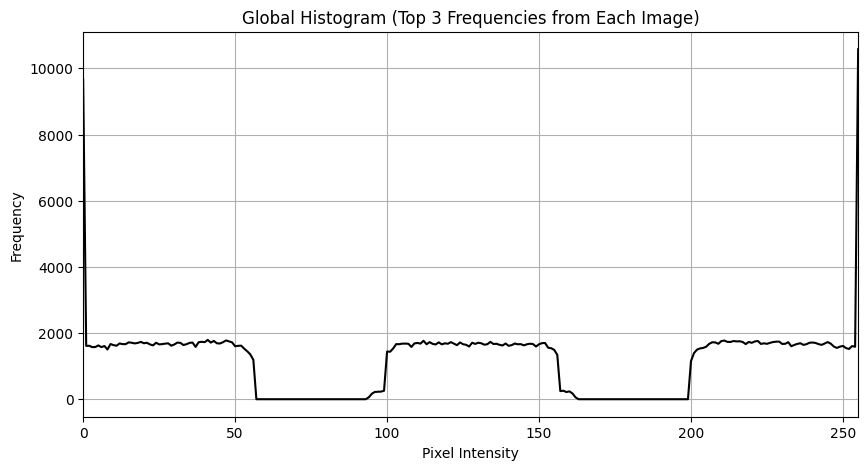

[ 9658  1611  1616  1574  1578  1626  1575  1608  1503  1667  1635  1617
  1685  1665  1665  1719  1706  1687  1703  1733  1691  1706  1655  1628
  1707  1657  1666  1680  1689  1618  1655  1711  1703  1638  1663  1703
  1712  1582  1722  1735  1725  1793  1711  1762  1690  1684  1723  1777
  1747  1719  1602  1614  1619  1527  1448  1354  1190     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0    59   167
   221   227   230   256  1441  1435  1533  1666  1663  1680  1681  1676
  1580  1687  1700  1681  1767  1661  1726  1672  1655  1719  1658  1689
  1677  1725  1681  1634  1717  1662  1645  1592  1708  1671  1707  1691
  1647  1663  1733  1669  1675  1644  1625  1684  1614  1635  1683  1661
  1665  1628  1660  1677  1668  1592  1661  1696  1698  1557  1541  1491
  1341   245   257   217   237   175    58     0   

In [121]:
images = dice_x

def compute_global_histogram(images):
    # Inicjalizowanie globalnego histogramu
    global_histogram = np.zeros(256, dtype=int)
    
    # Iteracja przez każdy obraz
    for image in images:
        # Zliczanie wystąpień pikseli w danym obrazie
        hist, _ = np.histogram(image, bins=np.arange(257))  # 256 binów dla wartości 0-255
        
        # Wybieramy 3 najbardziej liczne wartości
        most_frequent = np.argsort(hist)[-3:]  # Indeksy 3 największych wartości
        for value in most_frequent:
            global_histogram[value] += 1  # Dodajemy do globalnego histogramu
    
    return global_histogram

def plot_histogram(hist):
    plt.figure(figsize=(10, 5))
    plt.plot(hist, color='black')
    plt.title('Global Histogram (Top 3 Frequencies from Each Image)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])
    plt.grid()
    plt.show()

# Obliczamy globalny histogram
global_histogram = compute_global_histogram(images)

# Wyświetlamy histogram
plot_histogram(global_histogram)
print(global_histogram)

In [110]:
#XD
#3 przykłdowe progi
p3 = 255
p1 = p3 / 3
p2 = p3 * 2 / 3

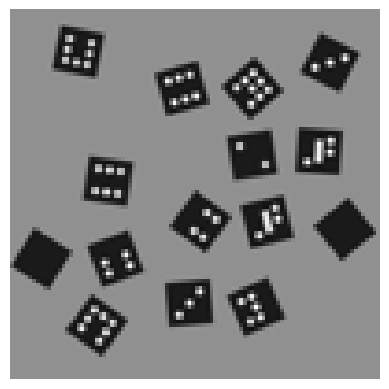

In [86]:
plt.imshow(dice_x[345], cmap='gray')
plt.axis('off')  # Wyłącz osie
plt.show()


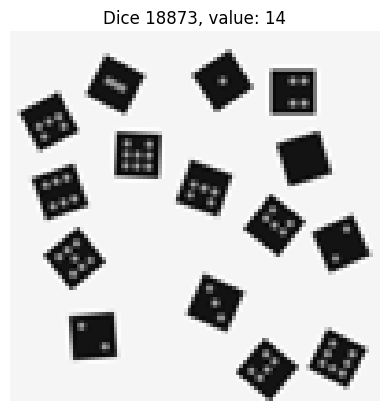

In [7]:
index_100000 = 118873 % dice5_count

image_dice = dice_x[index_100000]
plt.imshow(image_dice, cmap='gray')
plt.title(f'Dice {index_100000}, value: {dice_y[index_100000]}')
plt.axis('off')  # Wyłącz osie
plt.show()


In [158]:
# Definiuj model sieci konwolucyjnej
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 6)  # Warstwa wyjściowa z 6 klasami

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = torch.load('dice_classifier.pth')
model.eval() 

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=6, bias=True)
)

Obraz 1: Klasa - 5, Prawdopodobieństwo - 0.991567
Obraz 2: Klasa - 6, Prawdopodobieństwo - 0.999979
Obraz 3: Klasa - 3, Prawdopodobieństwo - 1.000000
Obraz 4: Klasa - 2, Prawdopodobieństwo - 1.000000
Obraz 5: Klasa - 5, Prawdopodobieństwo - 0.981916
Obraz 6: Klasa - 5, Prawdopodobieństwo - 0.999797
Obraz 7: Klasa - 4, Prawdopodobieństwo - 1.000000
Obraz 8: Klasa - 5, Prawdopodobieństwo - 0.991123
Obraz 9: Klasa - 3, Prawdopodobieństwo - 0.715927
Obraz 10: Klasa - 5, Prawdopodobieństwo - 0.999283
Obraz 11: Klasa - 4, Prawdopodobieństwo - 1.000000
Obraz 12: Klasa - 6, Prawdopodobieństwo - 0.896022
Obraz 13: Klasa - 6, Prawdopodobieństwo - 1.000000
Obraz 14: Klasa - 3, Prawdopodobieństwo - 0.967139
Obraz 15: Klasa - 3, Prawdopodobieństwo - 0.999997


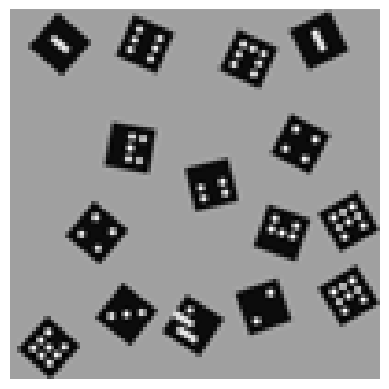

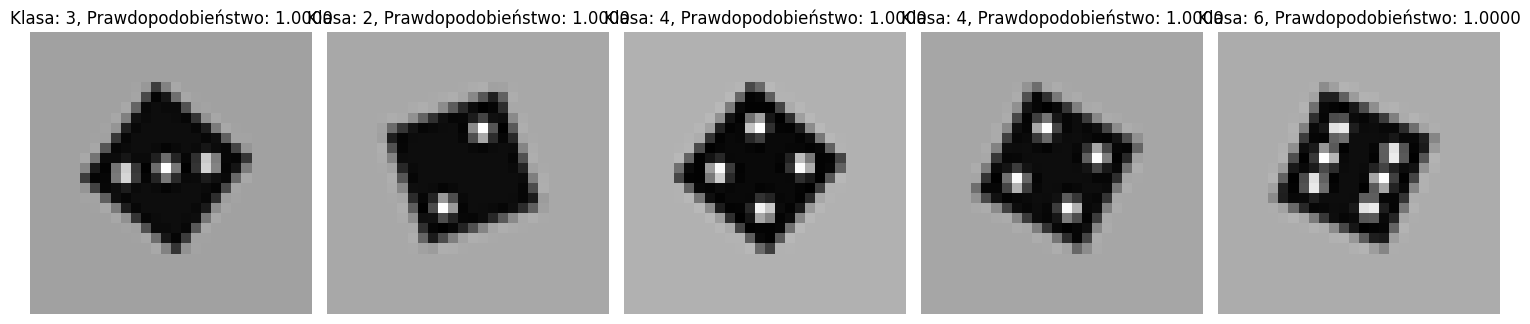

Suma klas pięciu obrazów z największym prawdopodobieństwem: 19
Reczywista etykieta: 19


In [161]:
idx = 10

def classify_images(model, images):
    model.eval()  # Ustaw model w tryb ewaluacji
    probabilities = []  # Lista do przechowywania prawdopodobieństw

    with torch.no_grad():  # Wyłącz gradienty, by oszczędzić pamięć
        for image in images:
            # Przygotowanie obrazu
            image_tensor = torch.tensor(image, dtype=torch.float32)  # Konwersja do tensora
            image_tensor = image_tensor.unsqueeze(0)  # Dodanie wymiaru dla batcha (1, C, H, W)

            # Normalizacja obrazu (dostosuj wartości, jeśli używasz innej normalizacji)
            image_tensor /= 255.0  # Jeśli obrazy są w zakresie 0-255

            # Przechodzimy przez model
            output = model(image_tensor)

            # Obliczanie prawdopodobieństw
            probs = F.softmax(output, dim=1)  # Użycie softmax do uzyskania prawdopodobieństw
            probabilities.append(probs.numpy())  # Dodanie do listy

    return np.array(probabilities)

def create_probability_dict(probabilities, image_list):
    results = []  # Lista do przechowywania wyników
    for idx, (probs, data) in enumerate(zip(probabilities, image_list)):
        class_idx = np.argmax(probs)  # Znajdź indeks klasy o największym prawdopodobieństwie
        probability = probs[0][class_idx]  # Odczytaj prawdopodobieństwo dla tej klasy
        results.append({
            'data' : data,
            'obraz': idx + 1,
            'klasa': class_idx + 1,  # Klasa (0-5)
            'prawdopodobieństwo': probability.item()  # Prawdopodobieństwo
        })
    return results

def sum_top_classes(probability_dict, top_n=5):
    # Sortowanie słownika według prawdopodobieństw w malejącej kolejności
    sorted_probabilities = sorted(probability_dict, key=lambda x: x['prawdopodobieństwo'], reverse=True)

    # Wybieranie top_n obrazów
    top_images = sorted_probabilities[:top_n]

    # Sumowanie klas
    total_class_sum = sum(image['klasa'] for image in top_images)

    return total_class_sum, top_images  # Zwracamy sumę klas oraz wybrane obrazy

def display_top_images(top_images):
    # Tworzenie figury do wyświetlenia obrazów
    fig, axs = plt.subplots(1, len(top_images), figsize=(15, 5))
    
    for ax, img_data in zip(axs, top_images):
        ax.imshow(img_data['data'], cmap='gray')  # Zakładamy, że obrazy są w skali szarości
        ax.set_title(f"Klasa: {img_data['klasa']}, Prawdopodobieństwo: {img_data['prawdopodobieństwo']:.4f}")
        ax.axis('off')  # Wyłączenie osi

    plt.tight_layout()
    plt.show()

# Przykład użycia
# images to lista obrazów (np. 100000x100x100)
# Przyjmuję, że obrazy są w formacie numpy.ndarray
image_list = get_dices(dice_x[idx])
# model = torch.load('dice_classifier.pth', map_location='cpu')

# Klasyfikacja obrazów
probabilities = classify_images(model, image_list)

# Wyświetlenie prawdopodobieństw
# for idx, probs in enumerate(probabilities):
#     print(f"Obraz {idx + 1}: Prawdopodobieństwa - {probs}")

probability_dict = create_probability_dict(probabilities, image_list)

# Wyświetlenie wyników
for result in probability_dict:
    print(f"Obraz {result['obraz']}: Klasa - {result['klasa']}, Prawdopodobieństwo - {result['prawdopodobieństwo']:.6f}")

total_class_sum, top_images = sum_top_classes(probability_dict)
plt.imshow(dice_x[idx], cmap='gray')
plt.axis('off')  # Wyłącz osie
plt.show()
display_top_images(top_images)
# Wyświetlenie wyników
print(f"Suma klas pięciu obrazów z największym prawdopodobieństwem: {total_class_sum}")
print(f"Reczywista etykieta: {dice_y[idx]}")

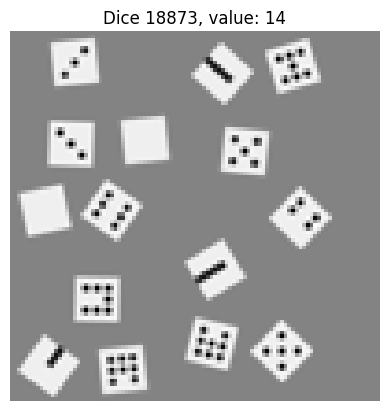

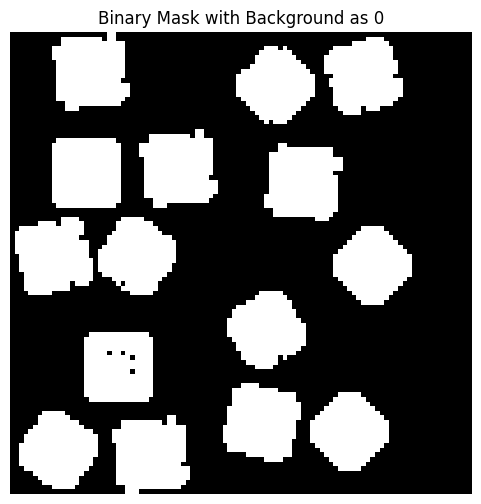

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


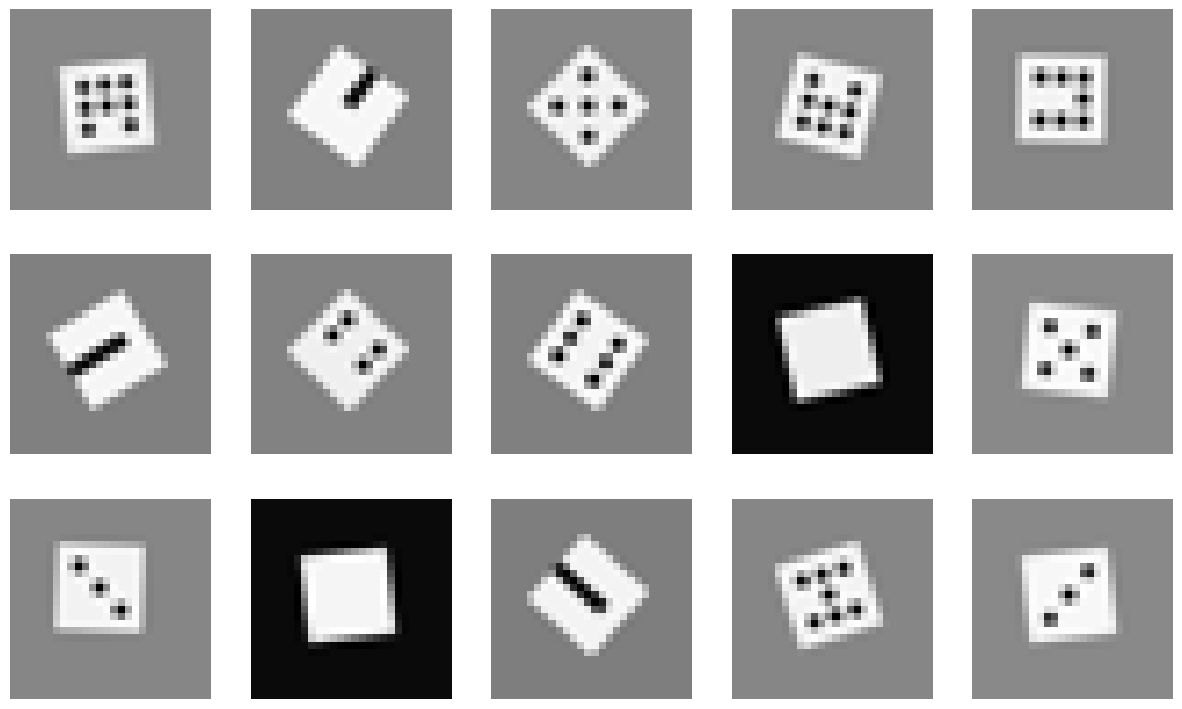

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


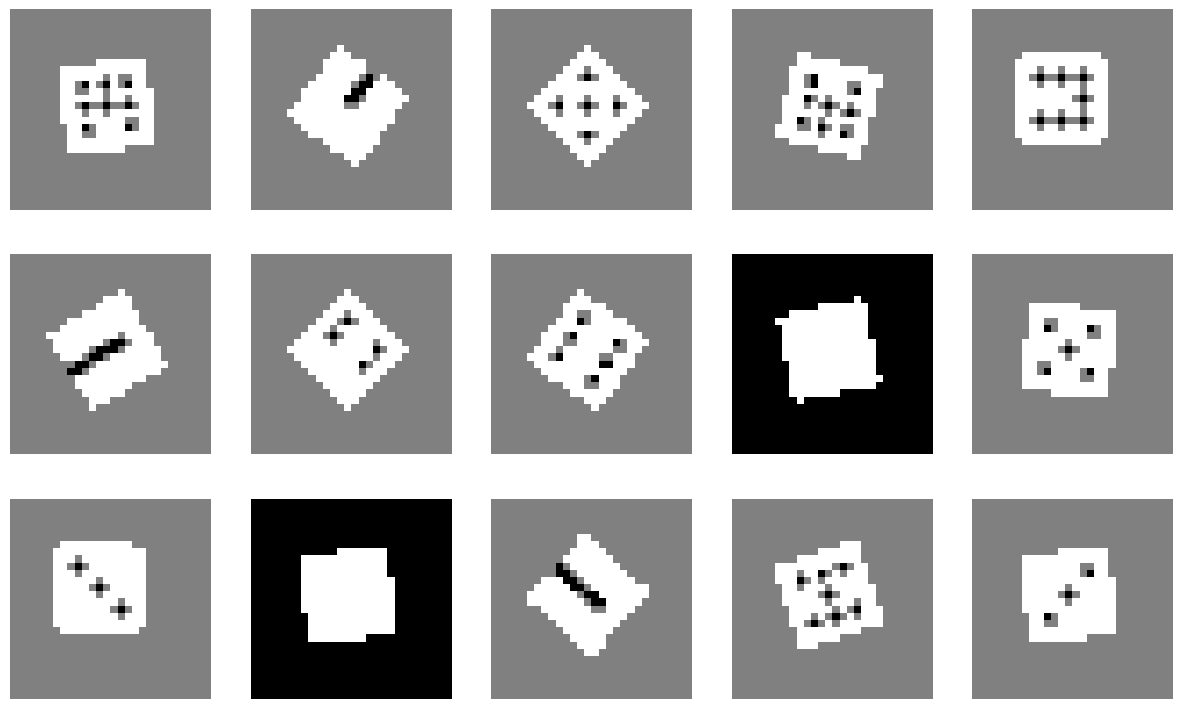

In [119]:
image_dice = dice_x[4]
plt.imshow(image_dice, cmap='gray')
plt.title(f'Dice {index_100000}, value: {dice_y[index_100000]}')
plt.axis('off')  # Wyłącz osie
plt.show()
x = extract_dice_images_from_array_background_base(image_dice)
show_dice_images(x)

reduced = []
for img in x:
    reduced.append(reduce_grayscale_colors(img, 3))

show_dice_images(reduced)

In [135]:
def get_dices(gray_image):
    return extract_dice_images_from_array_background_base(gray_image, showMask=False)

def reduce_grayscale_colors(gray_image, n_colors=3):
    # Upewniamy się, że obraz ma typ uint8
    if gray_image.dtype != np.uint8:
        gray_image = (gray_image * 255).astype(np.uint8) if gray_image.max() <= 1 else gray_image.astype(np.uint8)

    # Obliczamy progi dla trzech poziomów szarości
    thresholds = np.linspace(0, 255, n_colors + 1).astype(int)
    
    # Tworzymy nowy obraz, który będzie miał ograniczoną paletę kolorów
    reduced_image = np.zeros_like(gray_image)

    # Przypisujemy nowe wartości na podstawie progów
    for i in range(n_colors):
        reduced_image[(gray_image >= thresholds[i]) & (gray_image <= thresholds[i + 1])] = thresholds[i + 1]

    return reduced_image

def extract_dice_images_from_array_background_base(gray_image, showMask=True):
    # Upewnij się, że obraz jest typu uint8
    if gray_image.dtype != np.uint8:
        gray_image = (gray_image * 255).astype(np.uint8) if gray_image.max() <= 1 else gray_image.astype(np.uint8)

    # Oblicz histogram jasności
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    
    # Zidentyfikuj intensywność tła
    background_intensity = np.argmax(hist)

    # Stwórz maskę binarną: 1 tam, gdzie kolor różni się od tła, 0 gdzie jest tło
    # Ustal próg, aby zidentyfikować piksele podobne do tła
    threshold_value = background_intensity
    binary_mask = np.where(gray_image != threshold_value, 1, 0).astype(np.uint8)

    # Wyświetlenie maski binarnej w celu walidacji
    if showMask:
        plt.figure(figsize=(6, 6))
        plt.imshow(binary_mask, cmap='gray')
        plt.title("Binary Mask with Background as 0")
        plt.axis('off')
        plt.show()

    # Znajdowanie konturów (każdy kontur to jedna kostka)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    dice_images = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        #kostki są ujednolicone do rozmiaru 17 na 17 
        dice_image = gray_image[y:y+17, x:x+17]
        dice_image = resize_to_28x28(dice_image, background_intensity)
        dice_images.append(dice_image)

    return dice_images

def extract_dice_images(image_path):
    # Wczytaj obraz i konwertuj do skali szarości
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Oblicz histogram jasności
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    
    # Zidentyfikuj wartości tła i kostek na podstawie histogramu
    background_intensity = np.argmax(hist)
    dice_intensity = sorted(hist.flatten(), reverse=True)[1:].index(np.max(hist[1:]))  # Druga najczęstsza wartość
    
    # Binaryzacja obrazu dla wartości kostek
    _, binary_mask = cv2.threshold(gray, dice_intensity - 10, 255, cv2.THRESH_BINARY_INV)
    
    # Znajdowanie konturów (każdy kontur to jedna kostka)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    dice_images = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        dice_image = image[y:y+h, x:x+w]
        dice_images.append(dice_image)
    
    return dice_images

def extract_dice_images_from_array(gray_image):

    if gray_image.dtype != np.uint8:
        gray_image = (gray_image * 255).astype(np.uint8) if gray_image.max() <= 1 else gray_image.astype(np.uint8)
    # Oblicz histogram jasności
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    
        # Zidentyfikuj intensywności dla tła (najczęstsza wartość) i dla kostek (druga najczęstsza wartość)
    sorted_intensities = np.argsort(hist.flatten())[::-1]  # Sortowanie indeksów wg. liczności
    background_intensity = sorted_intensities[0]
    dice_intensity = sorted_intensities[1]  # Druga najczęstsza intensywność
    
    if dice_intensity > background_intensity:
        # Kostki są jaśniejsze niż tło
        _, binary_mask = cv2.threshold(gray_image, dice_intensity - 1, 255, cv2.THRESH_BINARY)
    else:
        # Kostki są ciemniejsze niż tło
        _, binary_mask = cv2.threshold(gray_image, dice_intensity + 20, 255, cv2.THRESH_BINARY_INV)
    
    # Wyświetlenie maski binarnej w celu walidacji
    plt.figure(figsize=(6, 6))
    plt.imshow(binary_mask, cmap='gray')
    plt.title("Binary Mask for Dice Detection")
    plt.axis('off')
    plt.show()
    
    # Znajdowanie konturów (każdy kontur to jedna kostka)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    dice_images = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        dice_image = gray_image[y:y+h, x:x+w]
        dice_images.append(dice_image)
    
    return dice_images

import matplotlib.pyplot as plt

def show_dice_images(dice_images):
    # Ustawiamy liczbę kolumn do wyświetlenia
    num_images = len(dice_images)
    num_cols = min(num_images, 5)  # Maksymalnie 5 kolumn, by uniknąć zbyt szerokiego układu
    num_rows = (num_images + num_cols - 1) // num_cols  # Wyliczamy liczbę wierszy
    
    # Tworzymy subplota
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
    axs = axs.ravel() if num_images > 1 else [axs]  # Zapewniamy jednorodny dostęp do osi
    
    for i, dice_image in enumerate(dice_images):
        print(dice_image.shape)
        axs[i].imshow(dice_image, cmap='gray')
        axs[i].axis('off')  # Usuwamy osie dla estetyki
    
    # Ukrycie pustych subpotów, jeśli liczba obrazów nie wypełnia wszystkich miejsc
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')
    
    plt.show()

def resize_to_28x28(image, fill_value=0):
    
    # Tworzymy nową tablicę o wymiarach 28x28 z wartościami wypełniającymi
    
    # Sprawdzenie wymiarów wejściowego obrazu
    original_height, original_width = image.shape
    
    new_image = np.full((28, 28), fill_value, dtype=image.dtype)
    
    # Obliczamy pozycję, w której umieścimy oryginalny obraz
    start_y = (28 - original_height) // 2
    start_x = (28 - original_width) // 2
    
    # Wypełniamy centralną część nowej tablicy oryginalnym obrazem
    new_image[start_y:start_y + original_height, start_x:start_x + original_width] = image
    
    return new_image




torch.Size([100000, 100, 100])
Epoch [1/5], Loss: 3469.2740, Train Accuracy: 9.82%, Test Accuracy: 10.01%
Epoch [2/5], Loss: 3456.0321, Train Accuracy: 9.80%, Test Accuracy: 10.03%
Epoch [3/5], Loss: 3448.7848, Train Accuracy: 10.28%, Test Accuracy: 9.91%
Epoch [4/5], Loss: 3398.7570, Train Accuracy: 11.94%, Test Accuracy: 9.98%
Epoch [5/5], Loss: 3227.6976, Train Accuracy: 15.95%, Test Accuracy: 10.52%
Accuracy on test set: 10.52%
Misclassified Examples:
Example 1: True Label: 14, Predicted Label: 17


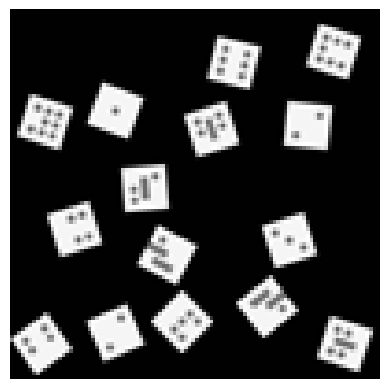

Example 2: True Label: 18, Predicted Label: 19


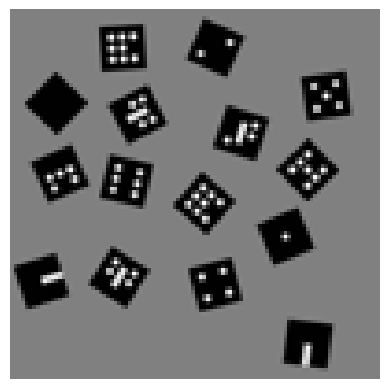

Example 3: True Label: 24, Predicted Label: 17


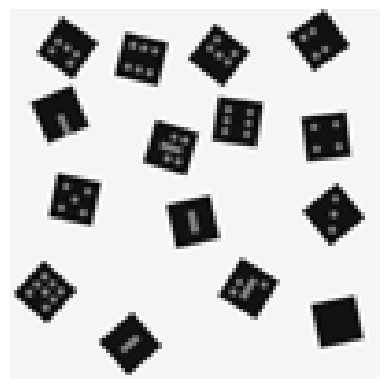

Example 4: True Label: 17, Predicted Label: 18


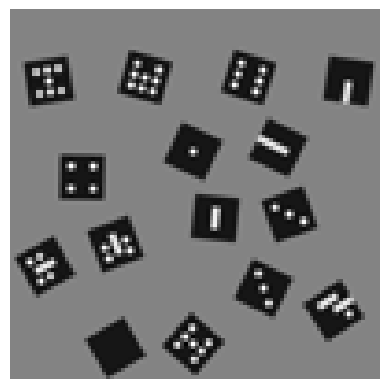

Example 5: True Label: 19, Predicted Label: 13


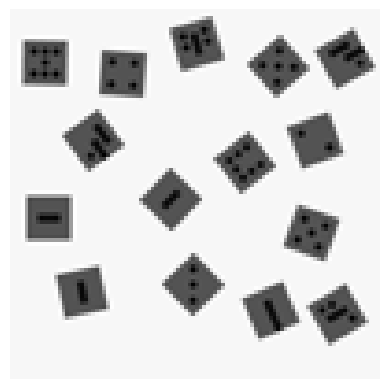

Example 6: True Label: 18, Predicted Label: 14


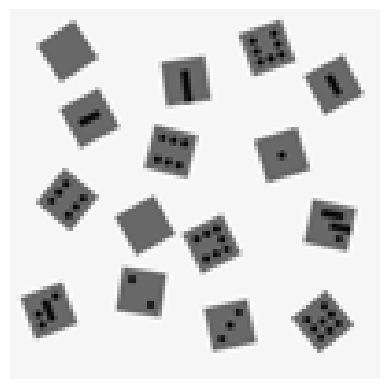

Example 7: True Label: 13, Predicted Label: 18


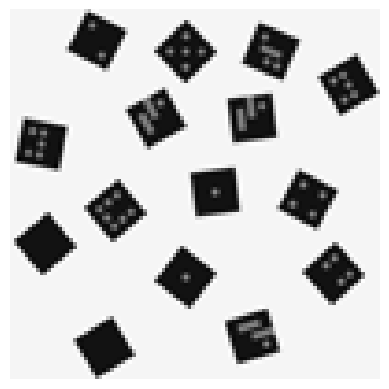

Example 8: True Label: 18, Predicted Label: 17


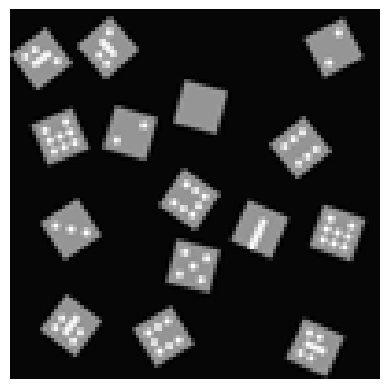

Example 9: True Label: 20, Predicted Label: 17


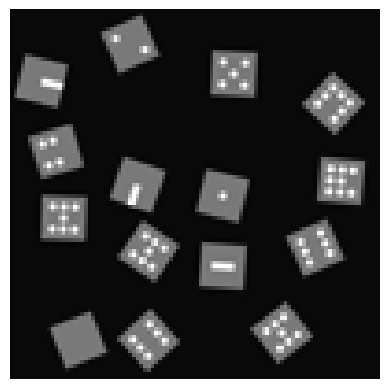

Example 10: True Label: 18, Predicted Label: 17


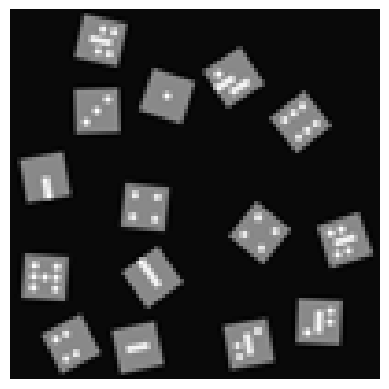

Example 11: True Label: 17, Predicted Label: 20


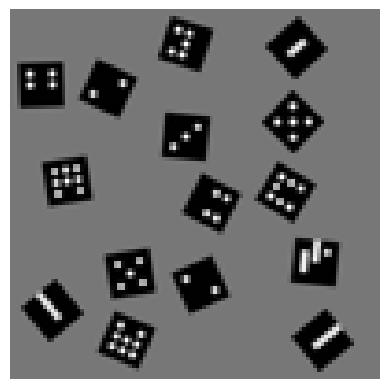

Example 12: True Label: 14, Predicted Label: 19


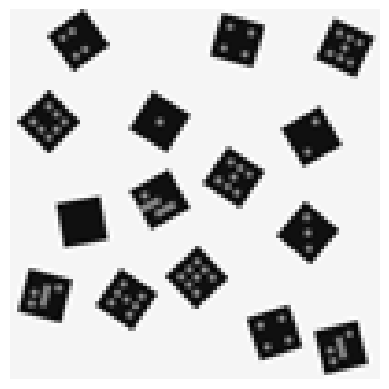

In [16]:
x_normalized = torch.tensor(dice_x / 255.0, dtype=torch.float32)
print(x_normalized.size())
y_tensor = torch.tensor(dice_y, dtype=torch.int64)

# Podziel dane na zbiory treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y_tensor, test_size=0.2, random_state=42, stratify=y_tensor)
# Dodanie wymiaru dla kanałow obrazu
x_train = x_train.unsqueeze(1)
x_test = x_test.unsqueeze(1)
# Odjęcie 5 od etykiet, aby dane były z zakresu 0-25, nie wypływa to na model,
# trzeba pamiętać że po tej operacji wyniki nie odpowiadają wprost na rzeczywistą liczbą oczek
y_train = y_train -5
y_test =  y_test -5
# Twórz obiekty DataLoader dla danych treningowych i testowych
batch_size = 64
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Definiuj model sieci konwolucyjnej
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 25 * 25, 64)
        self.fc2 = nn.Linear(64, 26)  # Warstwa wyjściowa z 6 klasami

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 25 * 25)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Inicjalizuj model
model = CNN()

# Definiuj funkcję straty i optymizator
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Trenuj model
num_epochs = 5
for epoch in range(num_epochs):
    total_train_loss = 0.0
    total_train_correct = 0
    total_train_samples = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Zlicz błędne klasyfikacje na zbiorze treningowym
        _, predicted = torch.max(outputs.data, 1)
        total_train_correct += (predicted == labels).sum().item()
        total_train_samples += labels.size(0)
        
        total_train_loss += loss.item()
    
    # Oblicz dokładność trenowania
    train_accuracy = 100 * total_train_correct / total_train_samples

    # Ocena dokładności modelu na zbiorze testowym
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        test_accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

# Ocena dokładności modelu na zbiorze testowym
with torch.no_grad():
    correct = 0
    total = 0
    misclassified_examples = []
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        misclassified_mask = predicted != labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        misclassified_examples.extend([(image, label, pred) for image, label, pred in zip(images[misclassified_mask], labels[misclassified_mask], predicted[misclassified_mask])])
    accuracy = 100 * correct / total
    print(f'Accuracy on test set: {accuracy:.2f}%')


print("Misclassified Examples:")
for idx, (image, label, prediction) in enumerate(misclassified_examples):
    print(f"Example {idx+1}: True Label: {label+5}, Predicted Label: {prediction+5}")
    plt.imshow(image[0], cmap='gray')
    plt.axis('off')  # Wyłącz osie
    plt.show()
    if idx > 10:
        break
    

In [10]:
labels1 = torch.zeros(len(dice_x), dtype=torch.long)  # Etykiety dla pierwszego zbioru danych
labels2 = torch.ones(len(mnist_x), dtype=torch.long)   # Etykiety dla drugiego zbioru danych
labels3 = torch.full((len(cifar_x),), 2, dtype=torch.long)  # Etykiety dla trzeciego zbioru danych

# Połącz zbiory danych w jeden
combined_data = torch.cat((torch.tensor(dice_x), torch.tensor(mnist_x), torch.tensor(cifar_x)), dim=0)

# Połącz etykiety w jeden tensor
combined_labels = torch.cat((labels1, labels2, labels3), dim=0)


print("combined:")
print(f"Label Shape: {combined_labels.shape} has NAN: {np.isnan(combined_labels).any()}")
print(f"Values : {np.unique(combined_labels)}")
print(f"Data Shape: {combined_data.shape} has NAN: {np.isnan(combined_data).any()}")
print(f"Values : {np.unique(combined_data)}")

combined:
Label Shape: torch.Size([170000]) has NAN: 0
Values : [0 1 2]
Data Shape: torch.Size([170000, 28, 28]) has NAN: 0
Values : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213

In [44]:
x_normalized = combined_data.clone().detach() / 255.0
print(x_normalized.size())
y_tensor = combined_labels.clone().detach().long()

# Podziel dane na zbiory treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y_tensor, test_size=0.2, random_state=42, stratify=y_tensor)
# Dodanie wymiaru dla kanałow obrazu
x_train = x_train.unsqueeze(1)
x_test = x_test.unsqueeze(1)
# Twórz obiekty DataLoader dla danych treningowych i testowych
batch_size = 64
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Definiuj model sieci konwolucyjnej
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 3)  # Warstwa wyjściowa z 6 klasami

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Inicjalizuj model
model = CNN()

# Definiuj funkcję straty i optymizator
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Trenuj model
num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Ocena dokładności modelu na zbiorze testowym
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy on test set: {accuracy:.2f}%')

torch.Size([170000, 28, 28])
Epoch [1/10], Loss: 0.0019
Epoch [2/10], Loss: 0.0044
Epoch [3/10], Loss: 0.0118
Epoch [4/10], Loss: 0.0000
Epoch [5/10], Loss: 0.0004
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0001
Epoch [10/10], Loss: 0.0000
Accuracy on test set: 99.97%


Label: 0, Count: 50000
Label: 1, Count: 50000
Label: 2, Count: 50000
combined:
Label Shape: torch.Size([150000]) has NAN: 0
Values : [0 1 2]
Data Shape: torch.Size([150000, 28, 28]) has NAN: 0
Values : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196

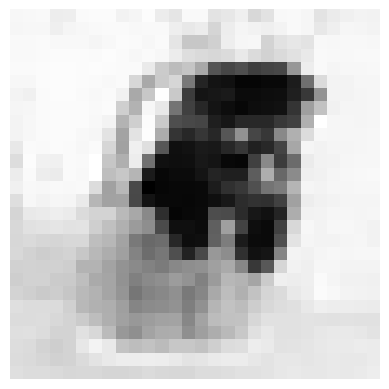

Example 2: True Label: 3, Predicted Label: 1


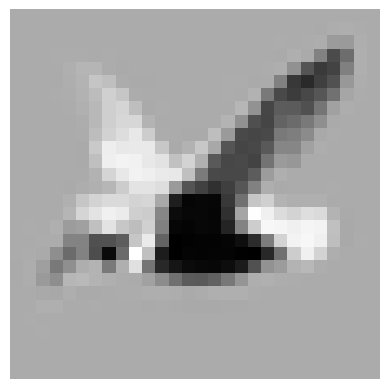

Example 3: True Label: 3, Predicted Label: 1


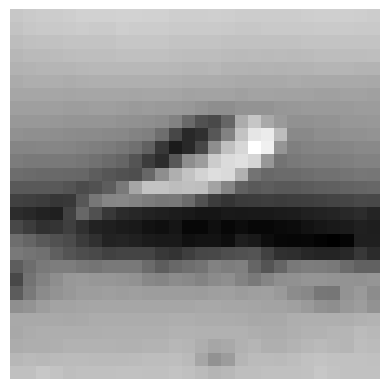

Example 4: True Label: 2, Predicted Label: 3


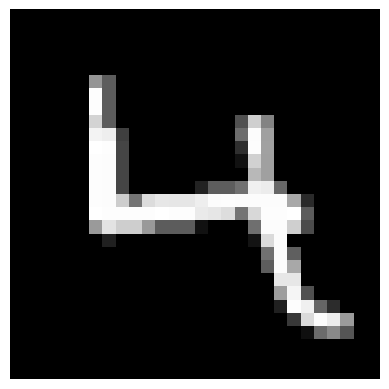

Example 5: True Label: 3, Predicted Label: 1


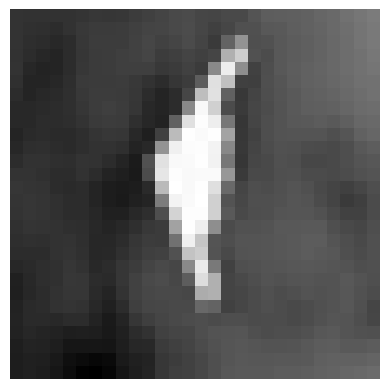

Example 6: True Label: 2, Predicted Label: 1


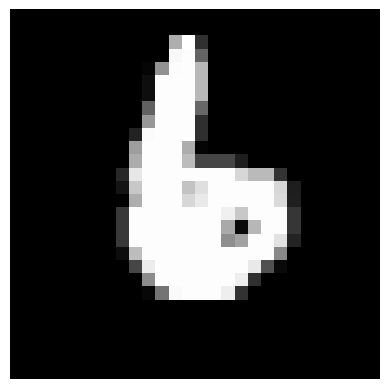

Example 7: True Label: 3, Predicted Label: 1


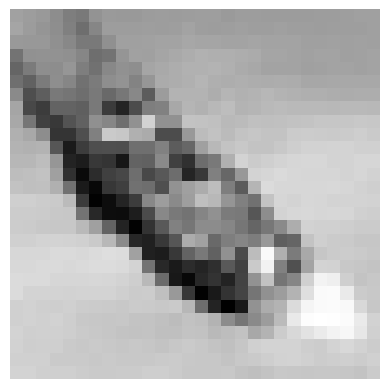

Example 8: True Label: 3, Predicted Label: 1


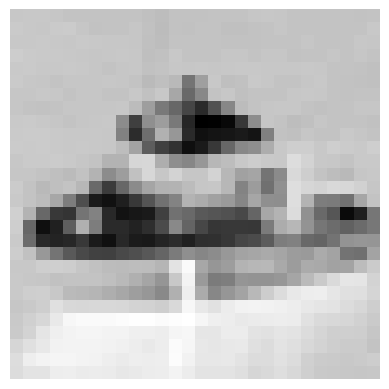

Example 9: True Label: 3, Predicted Label: 1


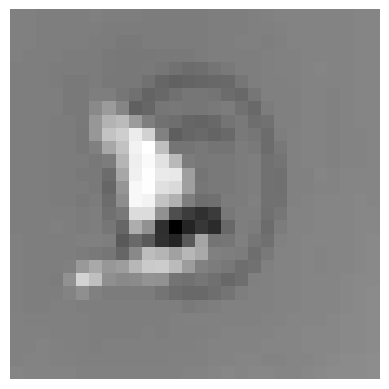

Example 10: True Label: 3, Predicted Label: 1


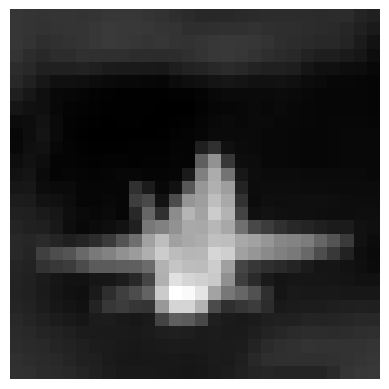

Example 11: True Label: 3, Predicted Label: 1


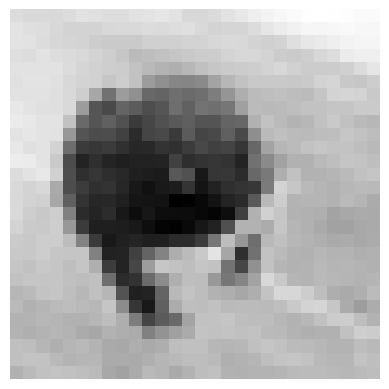

Example 12: True Label: 2, Predicted Label: 1


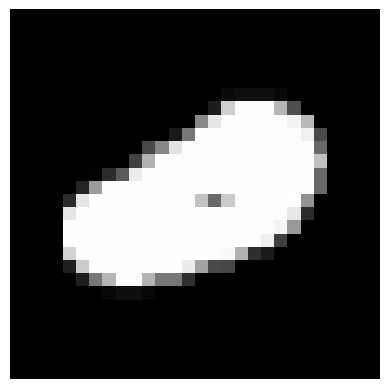

In [16]:
balanced_dice_x = dice_x[:int(len(dice_x) * 5/6)]  # Ogranicz do 5/6 oryginalnej długości tensora dice_x
balanced_mnist_x = mnist_x[:int(len(mnist_x) * 5/6)]

labels1 = torch.zeros(len(balanced_dice_x), dtype=torch.long)  # Etykiety dla pierwszego zbioru danych
labels2 = torch.ones(len(balanced_mnist_x), dtype=torch.long)   # Etykiety dla drugiego zbioru danych
labels3 = torch.full((len(cifar_x),), 2, dtype=torch.long)  # Etykiety dla trzeciego zbioru danych

# Połącz zbiory danych w jeden
combined_data = torch.cat((torch.tensor(balanced_dice_x), torch.tensor(balanced_mnist_x), torch.tensor(cifar_x)), dim=0)

# Połącz etykiety w jeden tensor
combined_labels = torch.cat((labels1, labels2, labels3), dim=0)

# Zliczanie wartości dla tensora combined_labels
unique_values, counts = np.unique(combined_labels.numpy(), return_counts=True)

# Wyświetlenie zliczeń
for value, count in zip(unique_values, counts):
    print(f"Label: {value}, Count: {count}")

print("combined:")
print(f"Label Shape: {combined_labels.shape} has NAN: {np.isnan(combined_labels).any()}")
print(f"Values : {np.unique(combined_labels)}")
print(f"Data Shape: {combined_data.shape} has NAN: {np.isnan(combined_data).any()}")
print(f"Values : {np.unique(combined_data)}")


x_normalized = combined_data.clone().detach() / 255.0
print(x_normalized.size())
y_tensor = combined_labels.clone().detach().long()

# Podziel dane na zbiory treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y_tensor, test_size=0.2, random_state=42, stratify=y_tensor)
# Dodanie wymiaru dla kanałow obrazu
x_train = x_train.unsqueeze(1)
x_test = x_test.unsqueeze(1)
# Twórz obiekty DataLoader dla danych treningowych i testowych
batch_size = 64
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Definiuj model sieci konwolucyjnej
class CNN_2(nn.Module):
    def __init__(self):
        super(CNN_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        # self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 7 * 7, 16)
        self.fc2 = nn.Linear(16, 3)  # Warstwa wyjściowa z 6 klasami

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        # x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Inicjalizuj model
model = CNN_2()

# Definiuj funkcję straty i optymizator
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Trenuj model
num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # Zlicz błędne klasyfikacje na zbiorze treningowym
        _, predicted = torch.max(outputs.data, 1)
        total_train_correct += (predicted == labels).sum().item()
        total_train_samples += labels.size(0)
        
        total_train_loss += loss.item()
    
    # Oblicz dokładność trenowania
    train_accuracy = 100 * total_train_correct / total_train_samples

    # Ocena dokładności modelu na zbiorze testowym
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        test_accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

# Ocena dokładności modelu na zbiorze testowym
with torch.no_grad():
    correct = 0
    total = 0
    misclassified_examples = []
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        misclassified_mask = predicted != labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        misclassified_examples.extend([(image, label, pred) for image, label, pred in zip(images[misclassified_mask], labels[misclassified_mask], predicted[misclassified_mask])])
    accuracy = 100 * correct / total
    print(f'Accuracy on test set: {accuracy:.2f}%')


print("Misclassified Examples:")
for idx, (image, label, prediction) in enumerate(misclassified_examples):
    print(f"Example {idx+1}: True Label: {label+1}, Predicted Label: {prediction+1}")
    plt.imshow(image[0], cmap='gray')
    plt.axis('off')  # Wyłącz osie
    plt.show()
    if idx > 10:
        break